#### An example about using matrix in solving problems.
$$
M = \begin{bmatrix}
0.9 & 0.3 \\
0.1 & 0.7 \\
\end{bmatrix}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#### Define this matrix in numpy

In [11]:
M = np.array([[0.9,0.3],[0.1,0.7]])
print(M)

[[0.9 0.3]
 [0.1 0.7]]


#### This matrix is conserved

In [38]:
print(M[0,0]+M[1,0]==1)
print(M[0,1]+M[1,1]==1)

True
True


#### Muliplied by itself 10 times

In [13]:
np.linalg.matrix_power(M,10)

array([[0.75151165, 0.74546504],
       [0.24848835, 0.25453496]])

#### 100 times!

In [14]:
np.linalg.matrix_power(M,100)

array([[0.75, 0.75],
       [0.25, 0.25]])

#### How does the muliplication result evolve.

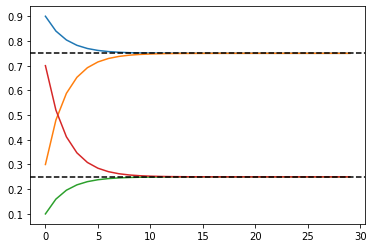

In [23]:
matrices = []
num = 30
for i in range(num):
    matrices.append(np.linalg.matrix_power(M,i+1))
plt.plot(np.arange(0,num,1),[mat[0,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[0,1] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,1] for mat in matrices])
plt.axhline(y=0.75,linestyle='--',c='k')
plt.axhline(y=0.25,linestyle='--',c='k')

#### A different plot

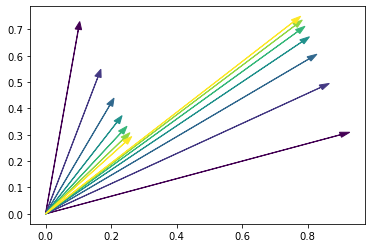

In [36]:
num_toplot = 7
colors=cm.viridis(np.linspace(0,1,num_toplot))
[plt.arrow(0,0,mat[0,0],mat[0,1],head_width=0.02,color=c) for mat,c in zip(matrices[:num_toplot],colors)]
[plt.arrow(0,0,mat[1,0],mat[1,1],head_width=0.02,color=c) for mat,c in zip(matrices[:num_toplot],colors)]

#### We define a new matrix which has one more constraint
$$
M = \begin{bmatrix}
1-\beta/2 & \beta/2 \\
\beta/2 & 1-\beta/2 \\
\end{bmatrix}$$

In [55]:
beta = 0.1
Mbeta = np.array([[1-beta/2,beta/2],[beta/2,1-beta/2]])
print(Mbeta)

[[0.95 0.05]
 [0.05 0.95]]


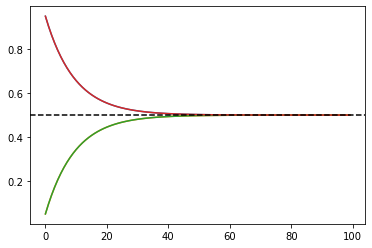

In [56]:
matrices = []
num = 100
for i in range(num):
    matrices.append(np.linalg.matrix_power(Mbeta,i+1))
plt.plot(np.arange(0,num,1),[mat[0,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[0,1] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,0] for mat in matrices])
plt.plot(np.arange(0,num,1),[mat[1,1] for mat in matrices])
plt.axhline(y=0.5,linestyle='--',c='k')

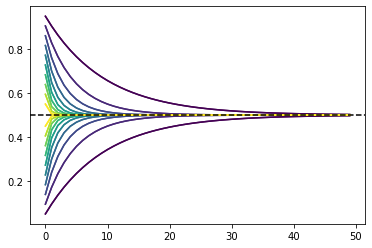

In [58]:
colors=cm.viridis(np.linspace(0,1,10))
for i, beta in enumerate(np.linspace(0.1,0.9,10)):
    color=colors[i]
    Mbeta = np.array([[1-beta/2,beta/2],[beta/2,1-beta/2]])
    matrices = []
    num = 50
    for i in range(num):
        matrices.append(np.linalg.matrix_power(Mbeta,i+1))
    plt.plot(np.arange(0,num,1),[mat[0,0] for mat in matrices],color=color)
    plt.plot(np.arange(0,num,1),[mat[0,1] for mat in matrices],color=color)
    plt.plot(np.arange(0,num,1),[mat[1,0] for mat in matrices],color=color)
    plt.plot(np.arange(0,num,1),[mat[1,1] for mat in matrices],color=color)
plt.axhline(y=0.5,linestyle='--',c='k')

### HOW to build a scattering model with minimum inputs

In [3]:
from scatter import *

#### Tell the program how many and how intensive these various scattering events are.

In [15]:
num_alpha, num_beta, num_delta = 50, 50, 50
value_alpha, value_beta, value_delta = 0.2, 0.8, 0.1

#### The program generates a sequence of scattering events according to your order

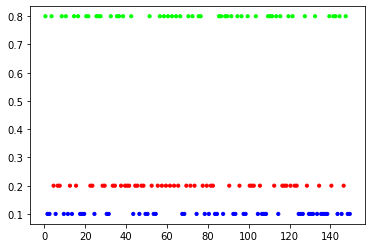

In [16]:
seq =  generate_bynumber(num_alpha, num_beta, num_delta, random_value=False, alpha=value_alpha, beta=value_beta, delta=value_delta)
plt.scatter(np.arange(0.5, len(seq[:, 0])+0.5, 1), [float(v) for v in seq[:, 1]],
            c=[[1, 0, 0] if t == 'A' else [0, 1, 0] if t == 'B' else [0, 0, 1] for t in seq[:, 0]], s=10)

#### Be aware of the randomness in generating such a sequence

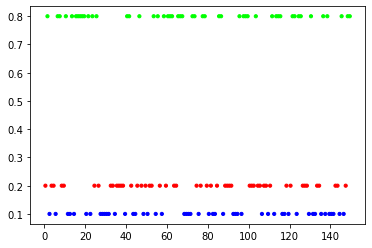

In [15]:
seq =  generate_bynumber(num_alpha, num_beta, num_delta, random_value=False, alpha=0.2, beta=0.8, delta=0.1)
plt.scatter(np.arange(0.5, len(seq[:, 0])+0.5, 1), [float(v) for v in seq[:, 1]],
            c=[[1, 0, 0] if t == 'A' else [0, 1, 0] if t == 'B' else [0, 0, 1] for t in seq[:, 0]], s=10)

#### To observe closely how these scattering events changes the electrochemical potential of each edge states

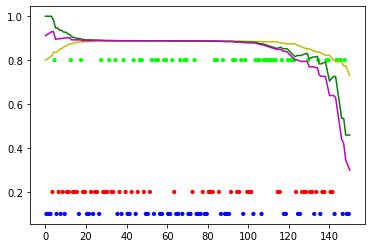

In [19]:
mu1_init, mu2_init, mu3_init = 0.8, 1, 0.3
init_state = [mu1_init, mu2_init, mu3_init]
states, _ = states_check(seq,init_state)
v1, v2, v3 = states[0,:],states[1,:],states[2,:]
plt.plot(v1,color='y')
plt.plot(v2,color='g')
plt.plot(v3,color='m')
plt.scatter(np.arange(0.5, len(seq[:, 0])+0.5, 1), [float(v) for v in seq[:, 1]],
            c=[[1, 0, 0] if t == 'A' else [0, 1, 0] if t == 'B' else [0, 0, 1] for t in seq[:, 0]], s=10)
# [plt.axvline(x=pos+0.5,color=c,linestyle='-.') for pos,c in zip(np.arange(0, len(seq[:, 0]), 1),[[0, 1, 0] if t == 'A' else [1, 0, 0] if t == 'B' else [0, 0, 1] for t in seq[:, 0]])]
plt.show()

#### Randomness induced by shuffling the scattering events in the sequence

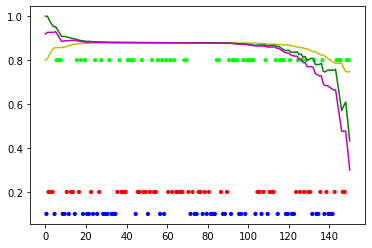

In [20]:
seq =  generate_bynumber(num_alpha, num_beta, num_delta, random_value=False, alpha=0.2, beta=0.8, delta=0.1)
states, _ = states_check(seq,init_state)
v1, v2, v3 = states[0,:],states[1,:],states[2,:]
plt.plot(v1,color='y')
plt.plot(v2,color='g')
plt.plot(v3,color='m')
plt.scatter(np.arange(0.5, len(seq[:, 0])+0.5, 1), [float(v) for v in seq[:, 1]],
            c=[[1, 0, 0] if t == 'A' else [0, 1, 0] if t == 'B' else [0, 0, 1] for t in seq[:, 0]], s=10)
# [plt.axvline(x=pos+0.5,color=c,linestyle='-.') for pos,c in zip(np.arange(0, len(seq[:, 0]), 1),[[0, 1, 0] if t == 'A' else [1, 0, 0] if t == 'B' else [0, 0, 1] for t in seq[:, 0]])]
plt.show()

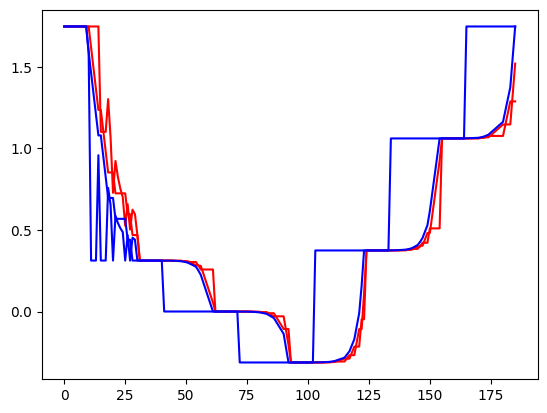

In [1]:
from allscatter import *
import matplotlib.pyplot as plt

# Define a six-terminal system with homogenous doping level (one single top gate)
# C1--M1--C2--M2--C3--M3--C4--M4--C1
# Total number of edge states: 4
# Number of forward-moving edge states: 2 (#0,#1)
# Number of backward-moving edge states: 2 (#2,#3)
#===============================================================
# General information for the system
m = 4
mf = 2
beta = 0.9
delta = 0.9
ground_terminal = 2
#===============================================================
# Information for scattering events
message1 = [[0,2,beta,10],[1,3,delta,10]]
message2 = [[0,2,beta,10],[1,2,delta,10]]
message3 = [[0,2,beta,10],[1,2,delta,10]]
message4 = [[0,2,beta,10],[1,2,delta,10]]
message5 = [[0,2,beta,10],[1,2,delta,10]]
message6 = [[0,2,beta,10],[1,2,delta,10]]
#================================================================
messages = [message1,message2,message3,message4,message5,message6]
seqs = []
for message in messages:
    seqs.append(generate_bynumber(message))

matrices = []
for seq in seqs:
    matrices.append(effective_matrix(seq,m,mf))

current = [1,0,0,-1,0,0]
sys = system(current,matrices,mf,ground_terminal)
#================================================================
# Your system has been defined, let us make some fun out of it.
sys.voltage_plot(10)

[[ 1.00054746e+00 -3.40856758e-05  0.00000000e+00 -1.00051337e+00]
 [-1.64090224e-01  1.64119607e-01 -2.93827429e-05  0.00000000e+00]
 [-6.44809460e-01 -3.55200979e-01  1.00053129e+00 -5.20851496e-04]
 [-5.13373881e-04  0.00000000e+00 -1.00052085e+00  1.00103423e+00]]
[1.00002575e+00 9.99858856e-01 0.00000000e+00 5.24520874e-04]


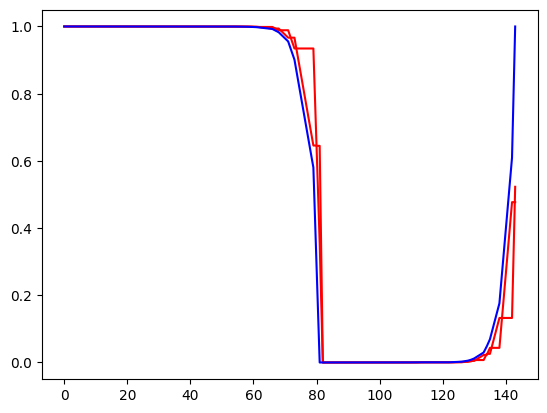

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from allscatter import *
# Define a four-terminal system comprising regions with different doping levels 
# (two or more top gates) Here we assume the system looks like:
# C1--M1--M2--C2--M3--M4--C3--M5--C4--M6--C1
# Total number of edge states: 3
# Number of forward-moving edge states: 2 (#0,#1)
# Number of backward-moving edge states: 1 (#2)
# In a differently doped region surrounding contact 2 (C2), only #0,#2 exist
#===============================================================
# General information for the system
m = 3
mf = 2
ground_terminal = 2
beta = 0.9
delta = 0.9
blocking_state = [[1,[1]]]
# The definition of blocking_state should strictly follow this rule: 
# [[index_of_terminal#1,[all blocked states in this terminal]],[[index_of_terminal#2,[all blocked states in this terminal],...]]]
#===============================================================
# Information for scattering events
message1 = [[0,2,beta,10],[1,2,delta,10]]
message2 = [[0,2,beta,10]] # #1 edge state does not exist here
message3 = [[0,2,beta,10]] # #1 edge state does not exist here
message4 = [[0,2,beta,10],[1,2,delta,10]]
message5 = [[0,2,beta,10],[1,2,delta,10]]
message6 = [[0,2,beta,10],[1,2,delta,10]]
#================================================================
messages = [message1+message2,message3+message4,message5,message6]
seqs = []
for message in messages:
    seqs.append(generate_bynumber(message))

matrices = []
for seq in seqs:
    matrices.append(effective_matrix(seq,m,mf))

current = [1,0,-1,0]
sys = system(current,matrices,mf,ground_terminal,blocking_state)
M = sys.mastermat()
print(M)
sys.voltage_plot(10)
print(sys.solve())

In [6]:
print([m.sum() for m in M])
print([M[:,i].sum() for i in range(M.shape[0])])

[-1.7763568394002505e-15, -2.6868206959426363e-15, -7.052843552235455e-15, -2.6645352591003757e-15]
[-0.49568700336908295, 0.4956987997569723, -1.179638790138604e-05, -2.220446049250313e-15]


In [3]:
m = 3
mf = 2
# ground_terminal = 2
# beta = 0.9
# delta = 0.9
blocking_state = [[1,[0]]]


id_term, id_edges = [info[0] for info in blocking_state], [info[1] for info in blocking_state]
edge_term_table=[]
scattered_edges = []
for i, edges in enumerate(id_edges):
    for edge in edges:
        edge_term_table.append([edge,id_term[i]])
        if edge not in scattered_edges:
            scattered_edges.append(edge)
print(scattered_edges)
print(edge_term_table)

num_term = 4

def prev(id,period=None):
    if period is None:
        period = num_term
    if int(id)==0:
        return int(period-1)
    else:
        return int(id-1)

    
def after(id,period=None):
    if period is None:
        period = num_term
    if int(id)==(period-1):
        return 0
    else:
        return int(id+1)

    
M1 = np.array([[0.28820226, 0.27720269, 0.43459505],
               [0.2178337, 0.21969339, 0.56247291],
               [0.49396403, 0.50310392, 0.00293204]])

M2 = np.array([[1,0,0],
               [0, 0.14465409, 0.85534591],
               [0, 0.85534591, 0.14465409]])

M1n = merge(M1,M2,mf)

M3 = np.array([[1,0,0],
               [0, 0.14465409, 0.85534591],
               [0, 0.85534591, 0.14465409]])

M4 = np.array([[0.53735814, 0.17277425, 0.28986761],
               [0.2151337, 0.08119532, 0.70367098],
               [0.24750816, 0.74603043, 0.0064614]])

M3n = merge(M3,M4,mf)

M5 = np.array([[0.188417214, 0.129727309, 0.681855477],
               [0.403811544, 0.27804748, 0.318140976],
               [0.407771243, 0.592225211, 0.00000354641924]])

M6 = np.array([[0.353672865, 0.207694992, 0.438632143],
               [0.276344362, 0.162290015, 0.561365623],
               [0.369982773, 0.630014993, 0.00000223431346]])


edges,table = scattered_edges, edge_term_table
effective_matrices = [M1n,M3n,M5,M6]

mat = np.zeros((num_term,num_term))


for t in range(num_term):
    premat, aftmat = effective_matrices[prev(t)], effective_matrices[t]
    mat[t, t] = m - premat[:mf, mf:].sum() - aftmat[mf:, :mf].sum()
    mat[t, prev(t)] = -premat[:mf, :mf].sum()
    mat[t, after(t)] = -aftmat[mf:, mf:].sum()

print(mat)
id_terminals, id_edgestates = id_term, id_edges
# print([m.sum() for m in mat])
# print([mat[:,i].sum() for i in range(mat.shape[0])])

for t in id_terminals:
# make corrections to the matrix elements connecting central terminal t and adjacent terminals t-1 and t+1.
    idt = id_terminals.index(t)
    premat, aftmat = effective_matrices[prev(t)], effective_matrices[t]
    mat[t, t] = mat[t, t]+sum([premat[id,mf:].sum() if id<mf else aftmat[id,:mf].sum() for id in id_edgestates[idt]])-len(id_edgestates[idt])
    mat[t, prev(t)] = mat[t, prev(t)]+sum([premat[id,:mf].sum() if id<mf else 0 for id in id_edgestates[idt]])
    mat[t, after(t)] = mat[t, after(t)]+sum([aftmat[id,mf:].sum() if id>=mf else 0 for id in id_edgestates[idt]])

for edge in edges:
    entry_term = [i for i in range(num_term)]
    for relation in table:
        if int(relation[0]) == edge:
            entry_term.remove(int(relation[1]))
    entry_term = sorted(entry_term)
    print(entry_term)
    if edge < mf:
        print('edge < mf')
        for i, term in enumerate(entry_term):
            premat = effective_matrices[prev(term)]
            i_prev = prev(i,len(entry_term)) 
            print('term=',term)
            print('i_prev=',i_prev)
            print('prev(term)=',prev(term))
            print('entry_term[i_prev]=',entry_term[i_prev])
            if entry_term[i_prev] is not prev(term):
                print('yes')
                merge_mat = effective_matrices[entry_term[i_prev]]
                current_term = entry_term[i_prev]
                while after(current_term) is not term:
                    print('after(current_term)=',after(current_term))
                    merge_mat = merge(merge_mat,effective_matrices[after(current_term)],mf)
                    print('current_term=',current_term)
                    current_term = after(current_term)
                mat[term,term] = mat[term,term]+premat[edge,mf:].sum()-merge_mat[edge,mf:].sum()
                mat[term,prev(term)] = mat[term,prev(term)]+premat[edge,:mf].sum()
                mat[term,entry_term[i_prev]] = mat[term,entry_term[i_prev]]-merge_mat[edge,:mf].sum()
    else:
        print('edge >= mf')
        for i, term in enumerate(entry_term):
            aftmat = effective_matrices[term]
            i_after = after(i,len(entry_term))
            if entry_term[i_after] is not after(term):
                merge_mat = effective_matrices[term]
                current_term = term
                while after(current_term) is not entry_term[i_after]:
                    merge_mat = merge(merge_mat,effective_matrices[after(current_term)],mf)
                    current_term = after(current_term)
                mat[term,term] = mat[term,term]+aftmat[edge,:mf].sum()-merge_mat[edge,:mf].sum()
                mat[term,after(term)] = mat[term,after(term)]+aftmat[edge,mf:].sum()
                mat[term,entry_term[i_after]]=mat[term,entry_term[i_after]]-merge_mat[edge,mf:].sum()
print(mat)    

[0]
[[0, 1]]
[[ 1.00081962e+00 -8.17380719e-04  0.00000000e+00 -1.00000223e+00]
 [-1.00081738e+00  1.00340015e+00 -2.58276954e-03  0.00000000e+00]
 [ 0.00000000e+00 -1.00258277e+00  1.00258633e+00 -3.54641924e-06]
 [-2.23431346e-06  0.00000000e+00 -1.00000355e+00  1.00000578e+00]]
[0, 2, 3]
edge < mf
term= 0
i_prev= 2
prev(term)= 3
entry_term[i_prev]= 3
term= 2
i_prev= 0
prev(term)= 1
entry_term[i_prev]= 0
yes
after(current_term)= 1
current_term= 0
term= 3
i_prev= 1
prev(term)= 2
entry_term[i_prev]= 2
[[ 1.00081962e+00 -8.17380719e-04  0.00000000e+00 -1.00000223e+00]
 [-1.21971804e-01  1.24554577e-01 -2.58276954e-03  0.00000000e+00]
 [-7.05703956e-01 -2.95089001e-01  1.00079651e+00 -3.54641924e-06]
 [-2.23431346e-06  0.00000000e+00 -1.00000355e+00  1.00000578e+00]]


In [43]:
mf

2

In [38]:
print([m.sum() for m in mat])
print([mat[:,i].sum() for i in range(mat.shape[0])])

[1.0000000161269895e-08, 3.997228712089573e-09, 8.353539912340794e-09, -3.1345992468345685e-10]
[0.1731416305732936, -0.17135180427199864, -0.0017898048447461123, 5.807598846274686e-10]


In [27]:
# if you want the same sequence (without randomized order) but with different values
message = [[0,2,beta*0.95,10],[2,1,beta*0.95,10]]
seq_copy = generate_bynumber(message)
print("Original sequence (First 10 elements to display):\n")
print(seq_copy[:10])
print("======================================================")
print("Modified sequence (First 10 elements to display):\n")
seq_copy[:,2] = 0.1
print(seq_copy[:10])

Original sequence (First 10 elements to display):

[[2.   1.   0.95]
 [0.   2.   0.95]
 [0.   2.   0.95]
 [2.   1.   0.95]
 [0.   2.   0.95]
 [2.   1.   0.95]
 [2.   1.   0.95]
 [0.   2.   0.95]
 [2.   1.   0.95]
 [2.   1.   0.95]]
Modified sequence (First 10 elements to display):

[[2.  1.  0.1]
 [0.  2.  0.1]
 [0.  2.  0.1]
 [2.  1.  0.1]
 [0.  2.  0.1]
 [2.  1.  0.1]
 [2.  1.  0.1]
 [0.  2.  0.1]
 [2.  1.  0.1]
 [2.  1.  0.1]]


In [7]:
diagram,size,aim = [[0,[1,3,5]],[1,[2,4,5]],[2,[0,4,5]]],6,[2,4]
mf=2
full = [0,1,2]
intermatrix = np.zeros((size,size))
distance = [0]*len(diagram)
matrices = [M1,M2,M3,M4,M5,M6]

def diagram_to_term(diagram):
    id_edge, id_terms  = [info[0] for info in diagram], [info[1] for info in diagram]
    term_edges = []
    for i in range(size):
        term_edges.append([i,[]])
    for i, terms in enumerate(id_terms):
        for term in terms:
            term_edges[term][1].append(id_edge[i])
    return term_edges
# print(term_edges)


# def merge_many(start,end,size,matrices,mf):
#     merge_mat = matrices[start]
#     current_term = start
#     while after(current_term,size) is not end:
#         merge_mat = merge(merge_mat,matrices[after(current_term,size)],mf)
#         current_term = after(current_term,size)
#     return merge_mat

def inverse(original_list, elements_to_remove):
    return [element for element in original_list if element not in elements_to_remove]
    

def prevn(id,n,period):
    i=0
    current_id = id
    while i<n:
        current_id = prev(current_id,period=period)
        i+=1
    return current_id


def aftern(id,n,period):
    i=0
    current_id = id
    while i<n:
        current_id = after(current_id,period=period)
        i+=1
    return current_id

# print('term_edges=',term_edges)

for terminal in range(size):
    start = terminal
    end = aim[1]
    j = aim[0]
    intermatrix[end,start] -= omegecal(j,start,end,size,matrices,diagram)
    print('start=',start)
    print(omegecal(j,start,end,size,matrices,diagram))

print(intermatrix)

NameError: name 'omegecal' is not defined

In [8]:
def omegecal(j,start,end,size,matrices,diagram):
    term_edges = diagram_to_term(diagram)
    print(term_edges[start][1])
    if after(start,size) is end:
        return matrices[prev(end,size)][np.ix_([j],term_edges[prev(end,size)][1])].sum()
    else:
        if len(term_edges[start][1])!=0:
            product = matrices[prev(end,size)][np.ix_([j],inverse(full,term_edges[prev(end,size)][1]))].sum() 
        else:
            product = 1
    print(product)
    print(matrices[prev(end,size)])
    # print(matrices[prev(end,size)][np.ix_([j],term_edges[prev(end,size)][1])])
    print(matrices[prev(end,size)][np.ix_([j],term_edges[prev(end,size)][1])].sum())
    product = product*matrices[start][np.ix_(inverse(full,term_edges[after(start,size)][1]),term_edges[start][1])].sum()
    print(matrices[start][np.ix_(inverse(full,term_edges[after(start,size)][1]),term_edges[start][1])])
    print(matrices[start][np.ix_(inverse(full,term_edges[after(start,size)][1]),term_edges[start][1])].sum())
    while aftern(start,2,size) is not end:
        start = after(start,size)
        print(start)
        if len(inverse(full,term_edges[start][1]))!=0:
            product = product*matrices[start][np.ix_(inverse(full,term_edges[start][1]),inverse(full,term_edges[after(start,size)][1]))].sum()
        print(np.ix_(inverse(full,term_edges[start][1])))
    return product
omegecal(2,5,4,size,matrices,diagram)

[0, 1, 2]
0.75249183
[[0.53735814 0.17277425 0.28986761]
 [0.2151337  0.08119532 0.70367098]
 [0.24750816 0.74603043 0.0064614 ]]
0.24750816
[[0.35367287 0.20769499 0.43863214]
 [0.27634436 0.16229002 0.56136562]]
2.0
0
(array([0, 1]),)
1
(array([1, 2]),)
2
(array([0, 2]),)


2.248391468827586

In [5]:
def omegajkp(om1,om2,j,k,p):
    return np.dot(om1[j,:][:,k],om2[k,:][:,p]).sum()

print(M5)
print(M6)
print(omegajkp(M5,M6,[2],[0],[2]))

[[1.88417214e-01 1.29727309e-01 6.81855477e-01]
 [4.03811544e-01 2.78047480e-01 3.18140976e-01]
 [4.07771243e-01 5.92225211e-01 3.54641924e-06]]
[[3.53672865e-01 2.07694992e-01 4.38632143e-01]
 [2.76344362e-01 1.62290015e-01 5.61365623e-01]
 [3.69982773e-01 6.30014993e-01 2.23431346e-06]]
0.17886157417086374


In [19]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
print(a[[1],:][:,[1,2]])
print(a[[1,2],:][:,[2]])
np.dot(a[[1],:][:,[1,2]],a[[1,2],:][:,[0,1]]).sum()

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[5 6]]
[[6]
 [9]]


135